In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_df = pd.merge(mouse_df, clinical_df, on='Mouse ID', how='outer')


# Display the data table for preview

data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_vol_df=data_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_df=mean_vol_df.to_frame()
# Preview DataFrame
mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_vol_df=data_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
std_err_df=stderr_vol_df.to_frame()
# Preview DataFrame
std_err_df


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames

reformatting = mean_df.unstack(0)
reformatting_df = reformatting["Tumor Volume (mm3)"]

# Preview that Reformatting worked
reformatting_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


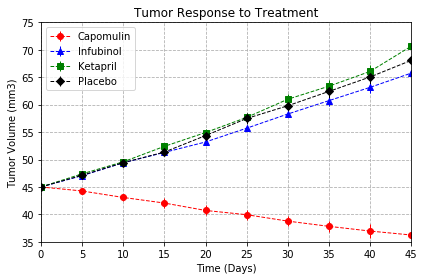

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45


stderror = std_err_df["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, reformatting_df["Capomulin"], yerr=stderror, fmt="o", ls="dashed", linewidth=1,color ="red")

stderror = std_err_df["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, reformatting_df["Infubinol"], yerr=stderror, fmt="^", ls="dashed", linewidth=1,color ="blue")

stderror = std_err_df["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, reformatting_df["Ketapril"], yerr=stderror, fmt="s", ls="dashed", linewidth=1,color = "green")

stderror = std_err_df["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, reformatting_df["Placebo"], yerr=stderror, fmt="D", ls="dashed", linewidth=1,color = "black")

plt.ylim(35, 75)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc="best")
plt.tight_layout()
plt.show()
# Save the Figure
plt.savefig("../Images/StdErr.png")


In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
site_mean_df=data_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
site_df=site_mean_df.to_frame()
# Preview DataFrame
site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_met_df=data_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
met_err_df=stderr_met_df.to_frame()
# Preview DataFrame
met_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
reformatting_met = site_df.unstack(0)
reformatting_met_df = reformatting_met["Metastatic Sites"]

# Preview that Reformatting worked
reformatting_met_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


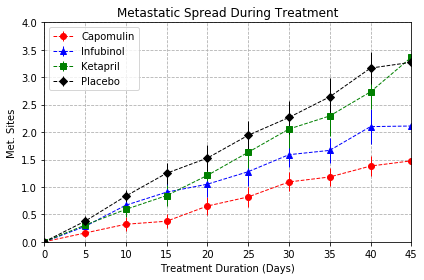

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45


stderror = met_err_df["Metastatic Sites"]["Capomulin"]
cap = plt.errorbar(x_axis, reformatting_met_df["Capomulin"], yerr=stderror, fmt="o", ls="dashed", linewidth=1,color ="red")

stderror = met_err_df["Metastatic Sites"]["Infubinol"]
infu = plt.errorbar(x_axis, reformatting_met_df["Infubinol"], yerr=stderror, fmt="^", ls="dashed", linewidth=1,color ="blue")

stderror = met_err_df["Metastatic Sites"]["Ketapril"]
keta = plt.errorbar(x_axis, reformatting_met_df["Ketapril"], yerr=stderror, fmt="s", ls="dashed", linewidth=1,color = "green")

stderror = met_err_df["Metastatic Sites"]["Placebo"]
plac = plt.errorbar(x_axis, reformatting_met_df["Placebo"], yerr=stderror, fmt="D", ls="dashed", linewidth=1,color = "black")

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc="best")
plt.tight_layout()
plt.show()
# Save the Figure
plt.savefig("../Images/SiteStdErr.png")



## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_df=data_df.groupby(["Drug","Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
survival_df=count_df.to_frame()
survival_df=survival_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
survival_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
reformatting_count = survival_df.unstack(0)
reformatting_survival_df = reformatting_count["Mouse Count"]
# Preview the Data Frame
reformatting_survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


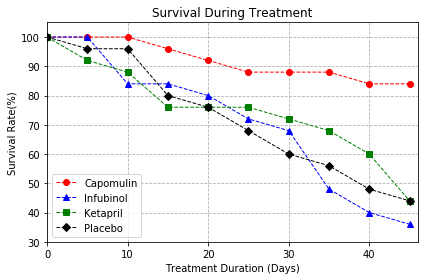

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate the Plot (Accounting for percentages)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45

cap = plt.errorbar(x_axis, (reformatting_survival_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1,color ="red")

infu = plt.errorbar(x_axis, (reformatting_survival_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1,color ="blue")

keta = plt.errorbar(x_axis, (reformatting_survival_df["Ketapril"]/25*100), fmt="s", ls="dashed", linewidth=1,color = "green")

plac = plt.errorbar(x_axis, (reformatting_survival_df["Placebo"]/25*100), fmt="D", ls="dashed", linewidth=1,color = "black")

plt.ylim(30, 105)
plt.xlim(0, 46)

plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate(%)")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),loc="best")
plt.tight_layout()
plt.show()
# Save the Figure
plt.savefig("../Images/Survival.png")

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

capchange = ((reformatting_df["Capomulin"][45] - reformatting_df["Capomulin"][0])/45)*100
ceftchange = ((reformatting_df["Ceftamin"][45] - reformatting_df["Ceftamin"][0])/45)*100
infuchange = ((reformatting_df["Infubinol"][45] - reformatting_df["Infubinol"][0])/45)*100
ketachange = ((reformatting_df["Ketapril"][45] - reformatting_df["Ketapril"][0])/45)*100
naftchange = ((reformatting_df["Naftisol"][45] - reformatting_df["Naftisol"][0])/45)*100
placchange = ((reformatting_df["Placebo"][45] - reformatting_df["Placebo"][0])/45)*100
propchange = ((reformatting_df["Propriva"][45] - reformatting_df["Propriva"][0])/45)*100
ramichange = ((reformatting_df["Ramicane"][45] - reformatting_df["Ramicane"][0])/45)*100
stelchange = ((reformatting_df["Stelasyn"][45] - reformatting_df["Stelasyn"][0])/45)*100
zonichange = ((reformatting_df["Zoniferol"][45] - reformatting_df["Zoniferol"][0])/45)*100

percentage_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Setlasyn","Zoniferol"],
                               "Percent Change": [capchange, infuchange, ketachange, naftchange,placchange,propchange,ramichange,stelchange,zonichange]
                              })

# Display the data to confirm
percentage_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Naftisol,53.923347
4,Placebo,51.297960
5,Propriva,47.241175
6,Ramicane,-22.320900
7,Setlasyn,52.085134
8,Zoniferol,46.579751


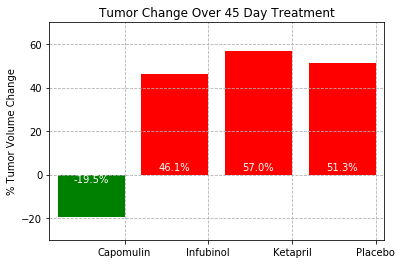

In [15]:
y_axis=[capchange, infuchange,ketachange,placchange]
x_axis = np.arange(len(y_axis))+.5
colors = []
for y in y_axis:
    if y < 0:
        colors.append('green')
    else:
        colors.append('red')
        
barchart=plt.bar(x_axis,y_axis, color=colors)
# Orient widths. Add labels, tick marks, etc. 

tick_locations = [value for value in x_axis+.4]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations,["Capomulin", "Infubinol", "Ketapril", "Placebo"])
# Use functions to label the percentages of changes
plt.xlim(0, 4)
plt.ylim(-30, 70)
                                                        
# Call functions to implement the function calls

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

count = .5
for r in y_axis:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1

# Save the Figure
plt.savefig("../Images/BarChart.png")

# Show the Figure
plt.show()

In [16]:
#Analysis

In [17]:
#1. In the observed data, the majority of drugs had no or negative effects on tumor size, while the Capomulin drug postiively affected the test subjects. 
#2. In the observed data, as time progressed, there became a correlation between a negative survival rate and time. 
#3. In the observed data, as time progressed, as did the Metastatic Spread. 